In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

### Nace Codes

These are the right NACE Codes for our test reports. Note that usually multiple codes are right!

In [16]:
NACE_codes = {
    "adidas-ar23.csv": "C",
    "bayer-annual-report-2023-2.csv": "C",
    "conti_annual-report-2023-data.csv": "C",
    "Deutsche_Annual-Report-2023.csv": "K",
    "heidelberg-materials_2023.csv": "B",
    "mercedes-benz-annual-report-2023-incl-combined-management-report-mbg-ag-2.csv": "G",
    "rheinmetall-ag_2023.csv": "C",
    "Siemens-Annual-Report-2023.csv": "C",
    "thyssenkrupp-GB_2023-2024_EN_WEB.csv": "C",
    "Zalando-SE_DE_241203_s.csv": "C"
}

### Load Sentence Similarities

In [17]:
paragraph_similarities = glob.glob("paragraph_sliding_window_3_similarities/*.csv")
paragraph_similarities

['paragraph_sliding_window_3_similarities/rheinmetall-ag_2023.csv',
 'paragraph_sliding_window_3_similarities/conti_annual-report-2023-data.csv',
 'paragraph_sliding_window_3_similarities/heidelberg-materials_2023.csv',
 'paragraph_sliding_window_3_similarities/Siemens-Annual-Report-2023.csv',
 'paragraph_sliding_window_3_similarities/thyssenkrupp-GB_2023-2024_EN_WEB.csv',
 'paragraph_sliding_window_3_similarities/Zalando-SE_DE_241203_s.csv',
 'paragraph_sliding_window_3_similarities/Deutsche_Annual-Report-2023.csv',
 'paragraph_sliding_window_3_similarities/bayer-annual-report-2023-2.csv',
 'paragraph_sliding_window_3_similarities/adidas-ar23.csv',
 'paragraph_sliding_window_3_similarities/mercedes-benz-annual-report-2023-incl-combined-management-report-mbg-ag-2.csv']

In [18]:
df_paragraph_similarities = [[os.path.basename(file).split(".")[0], pd.read_csv(file)] for file in paragraph_similarities]

##### Filter out only $cos(\theta)$ > 0.5

In [19]:
cos_threshold = 0.4

### Visualize mean scores

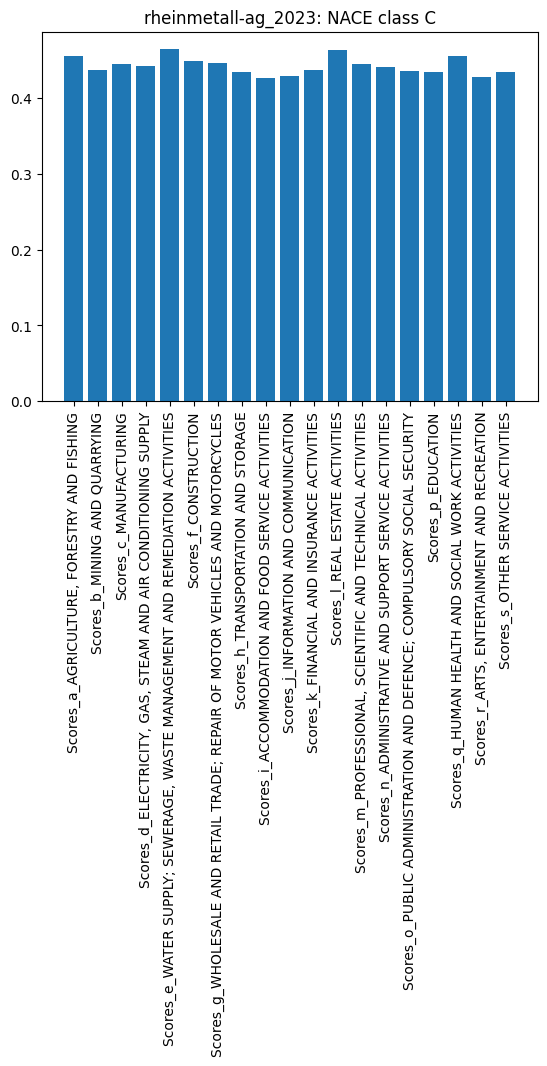

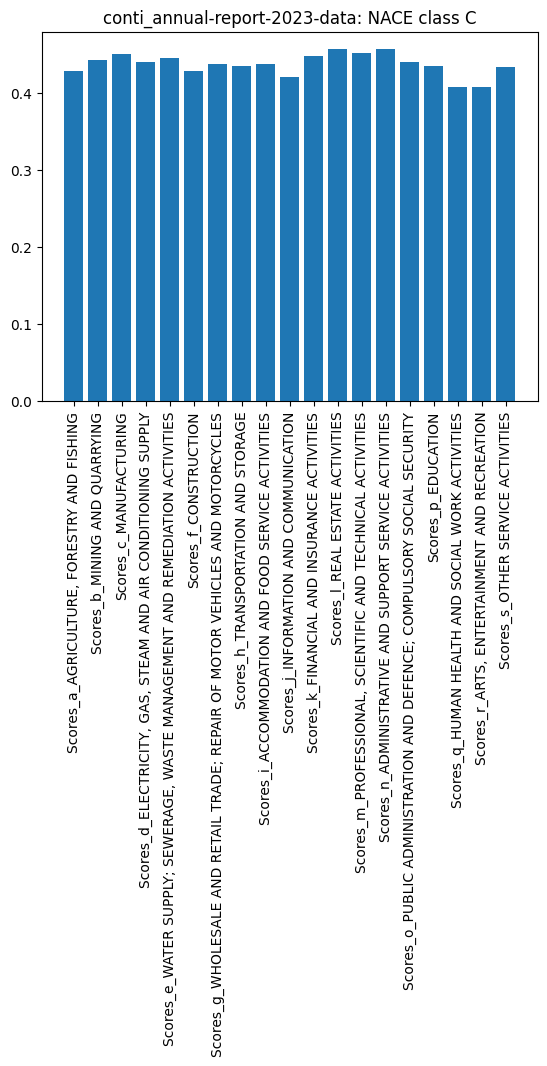

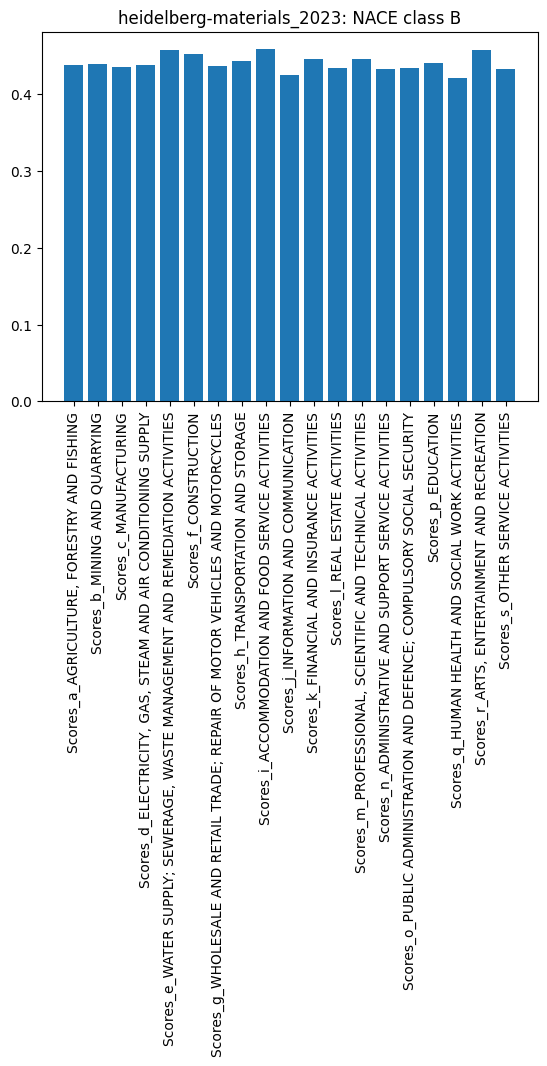

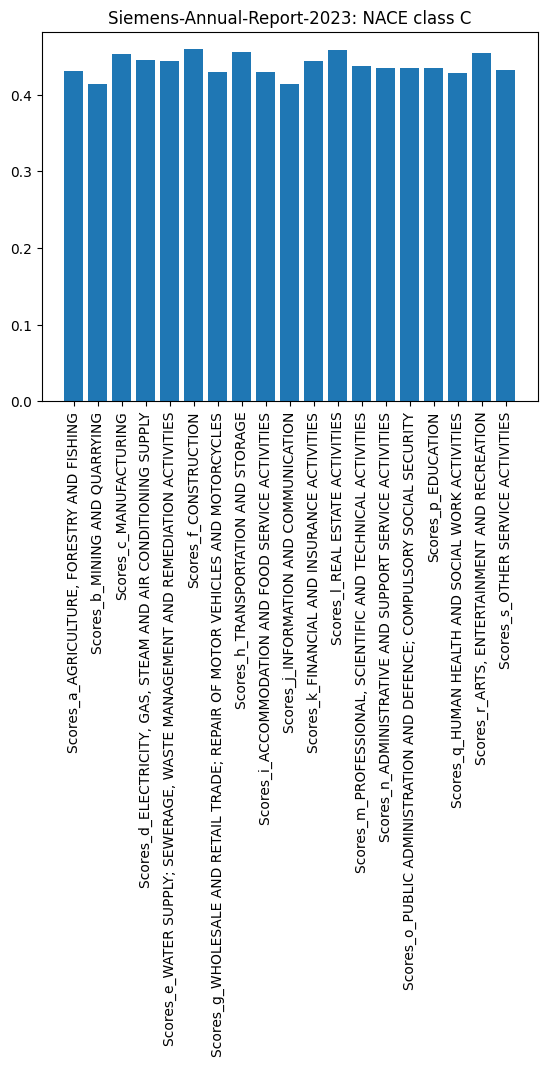

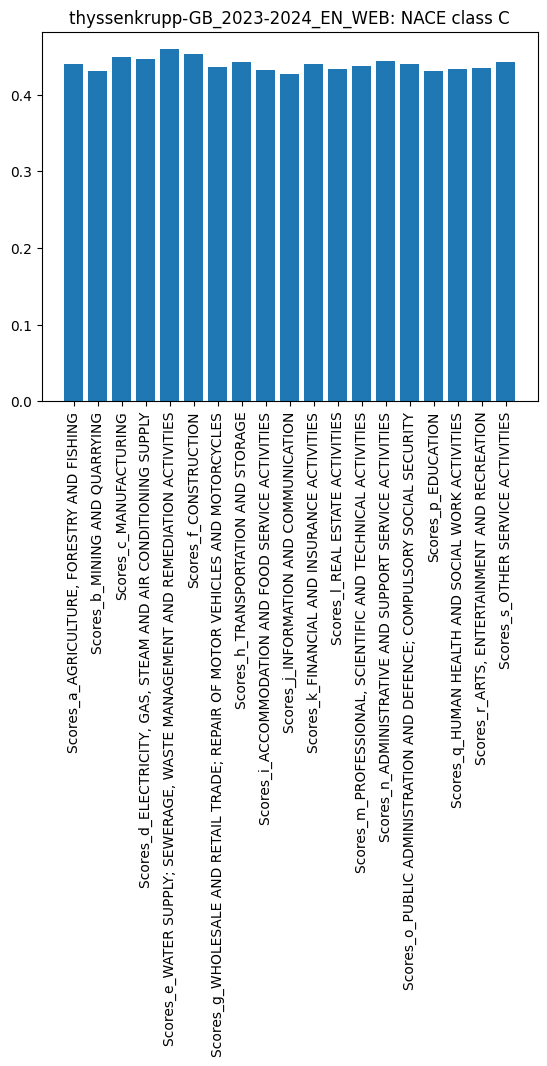

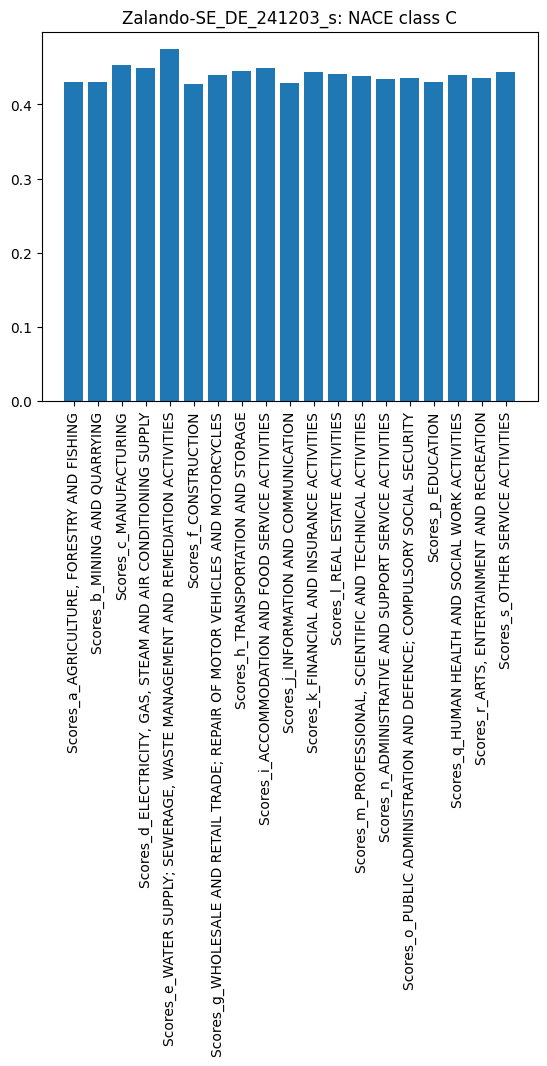

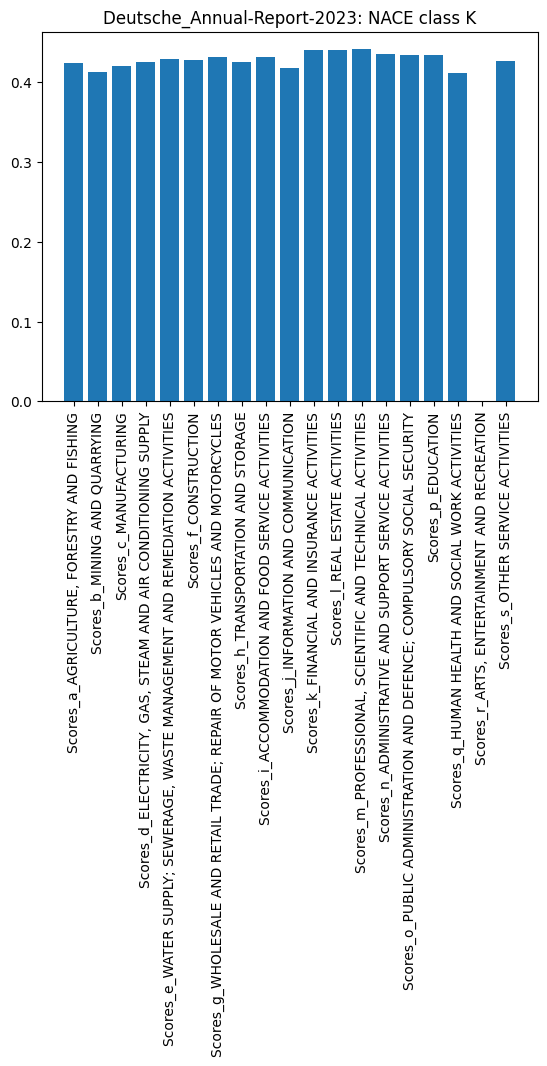

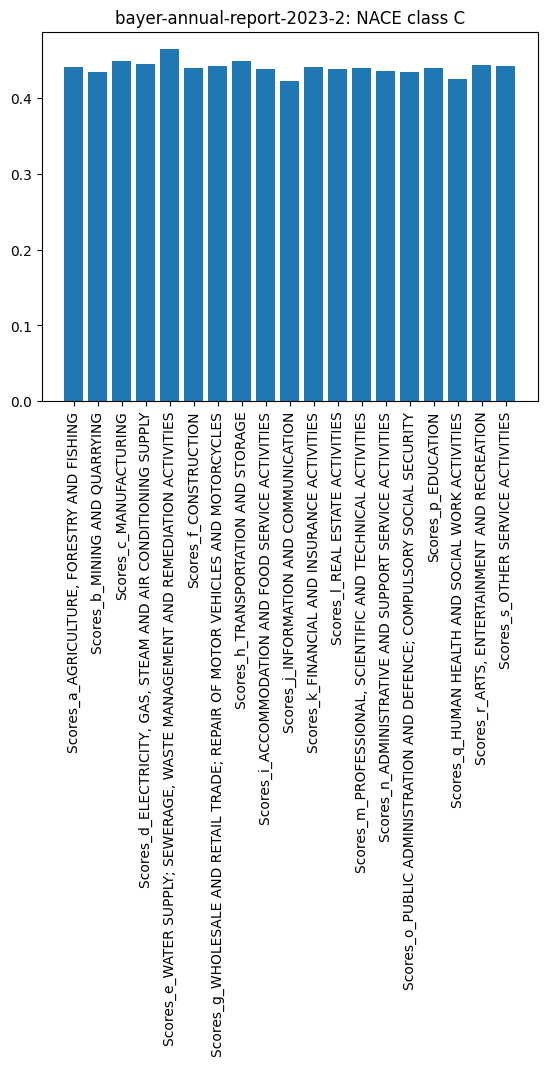

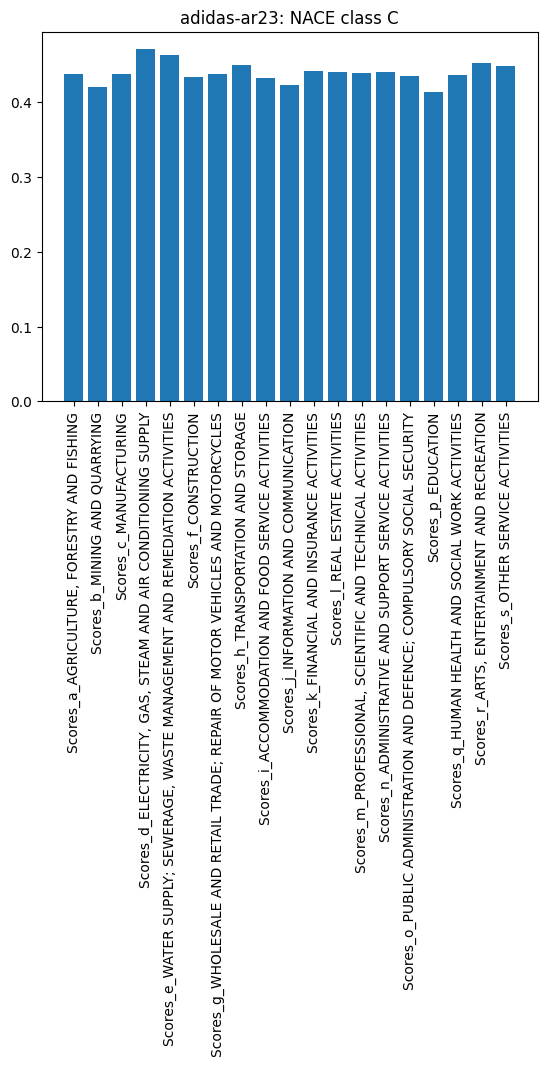

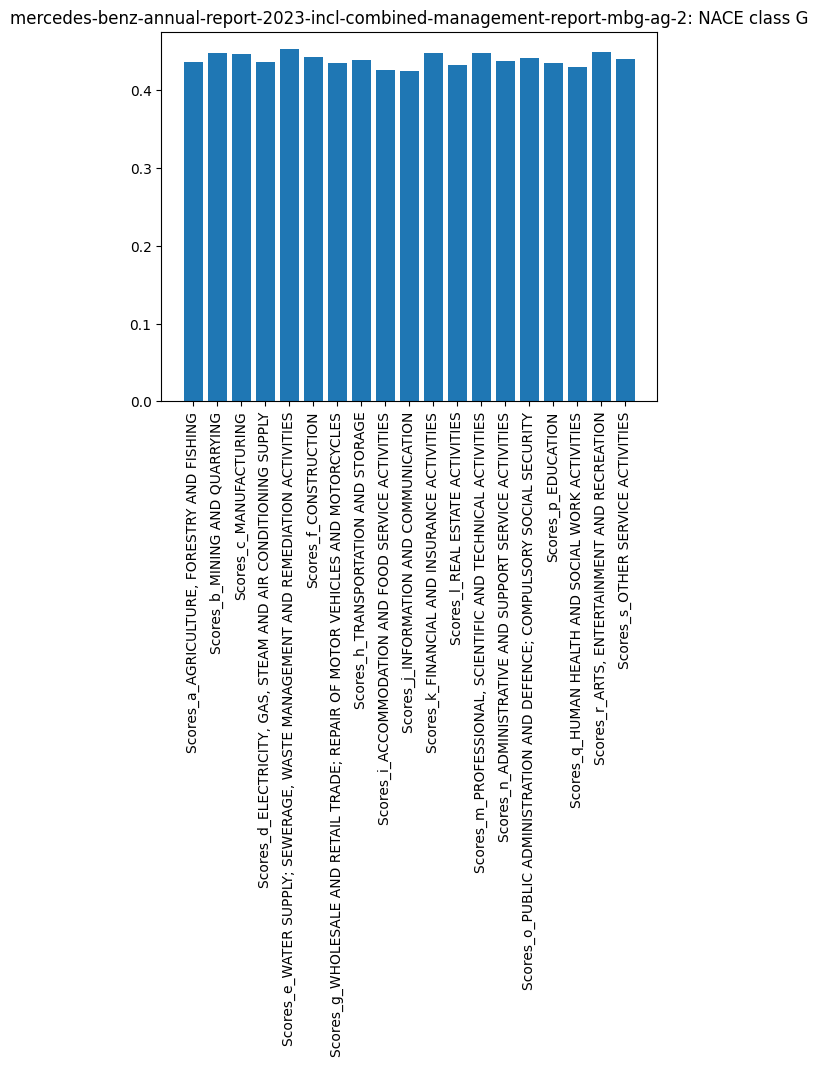

In [20]:
for i in range(len(df_paragraph_similarities)):
    #plt.bar(df_paragraph_similarities[i][1].iloc[:,3:].columns, df_paragraph_similarities[i][1].iloc[:,3:].mean())
    plt.bar(df_paragraph_similarities[i][1].iloc[:,3:].columns, df_paragraph_similarities[i][1].iloc[:, 3:][df_paragraph_similarities[i][1].iloc[:, 3:] > cos_threshold].mean())
    plt.xticks(rotation=90)
    plt.title(f"{os.path.basename(df_paragraph_similarities[i][0])}: NACE class {NACE_codes[df_paragraph_similarities[i][0]+'.csv']}")
    plt.show()

### Visualize distributions

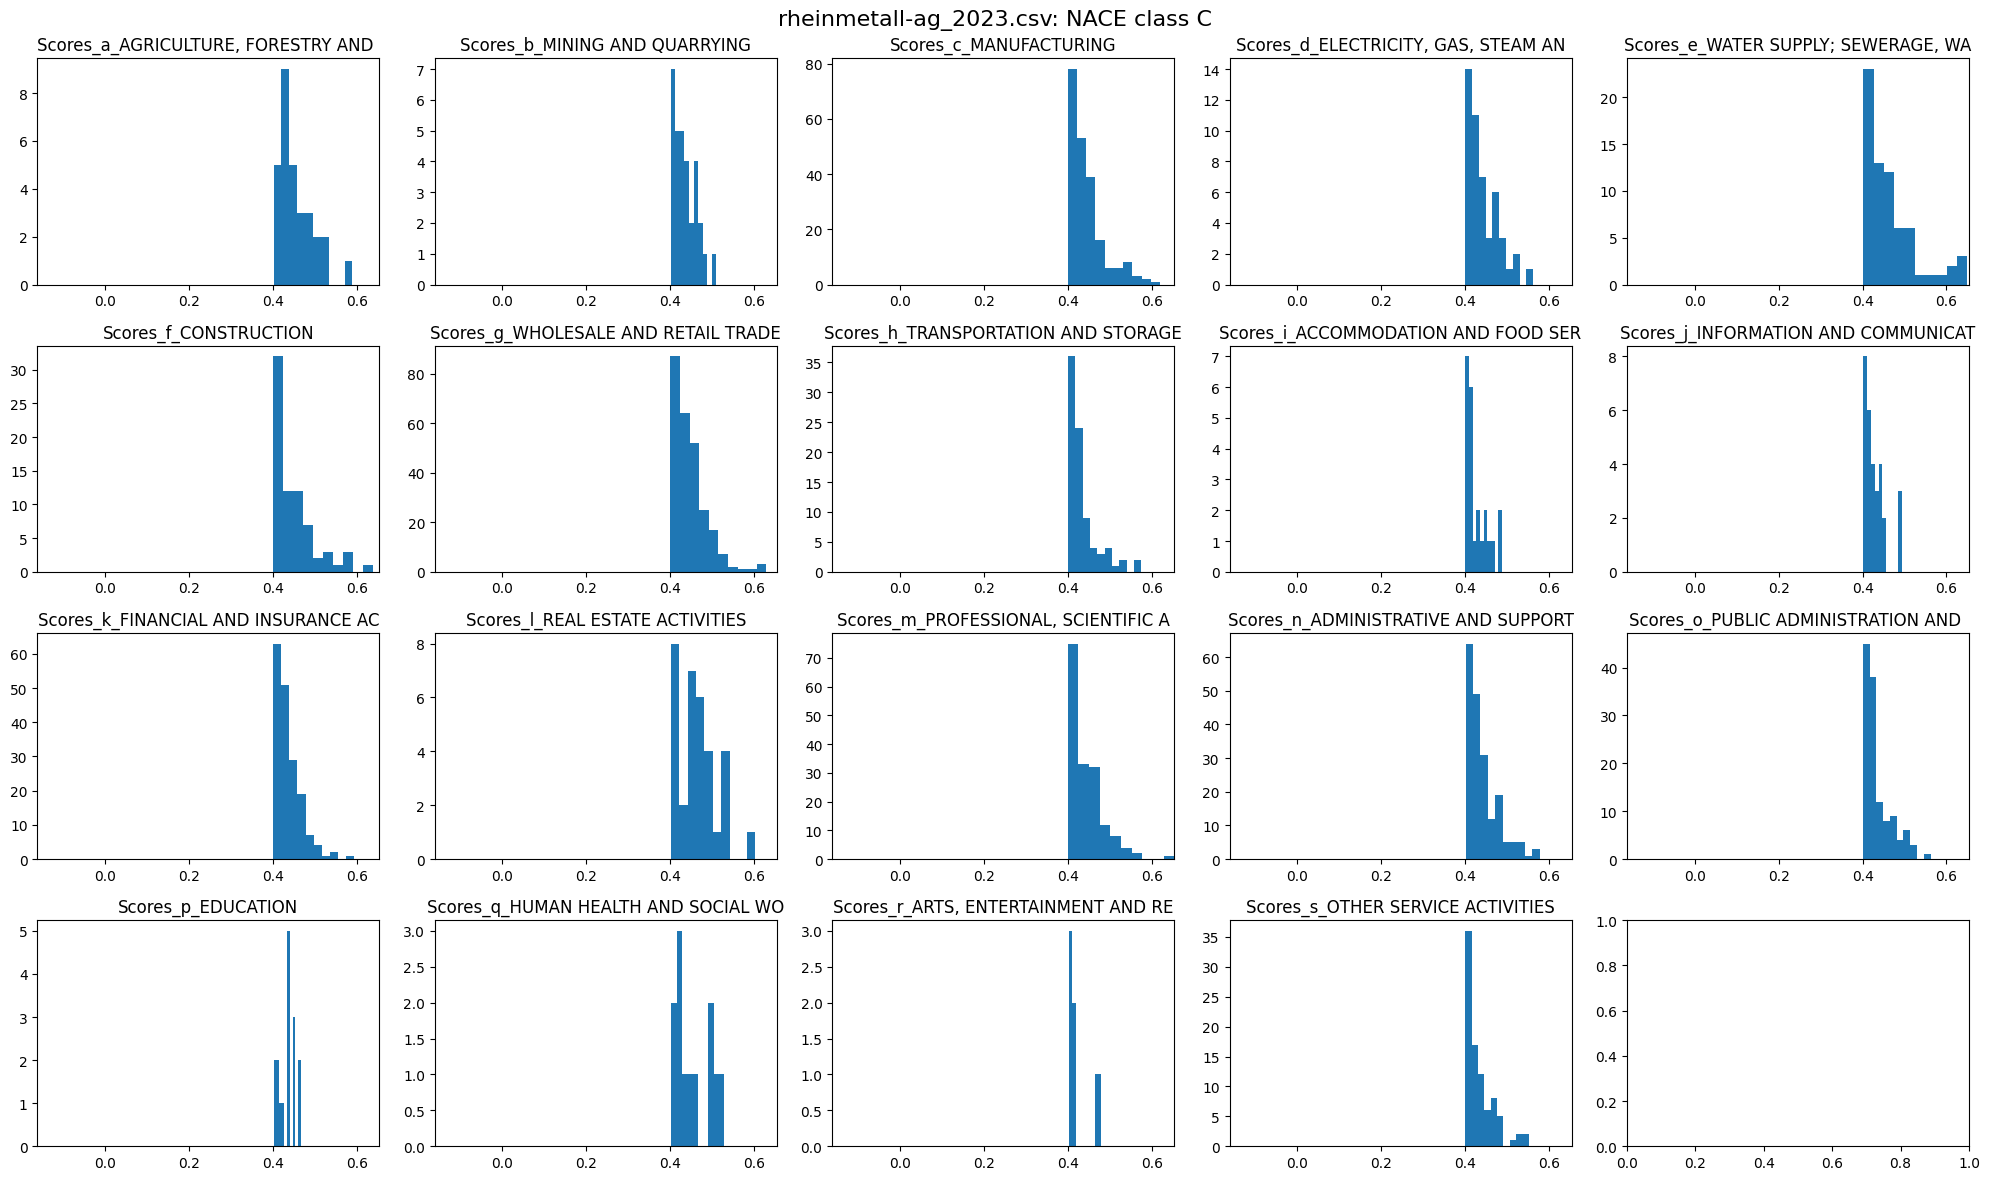

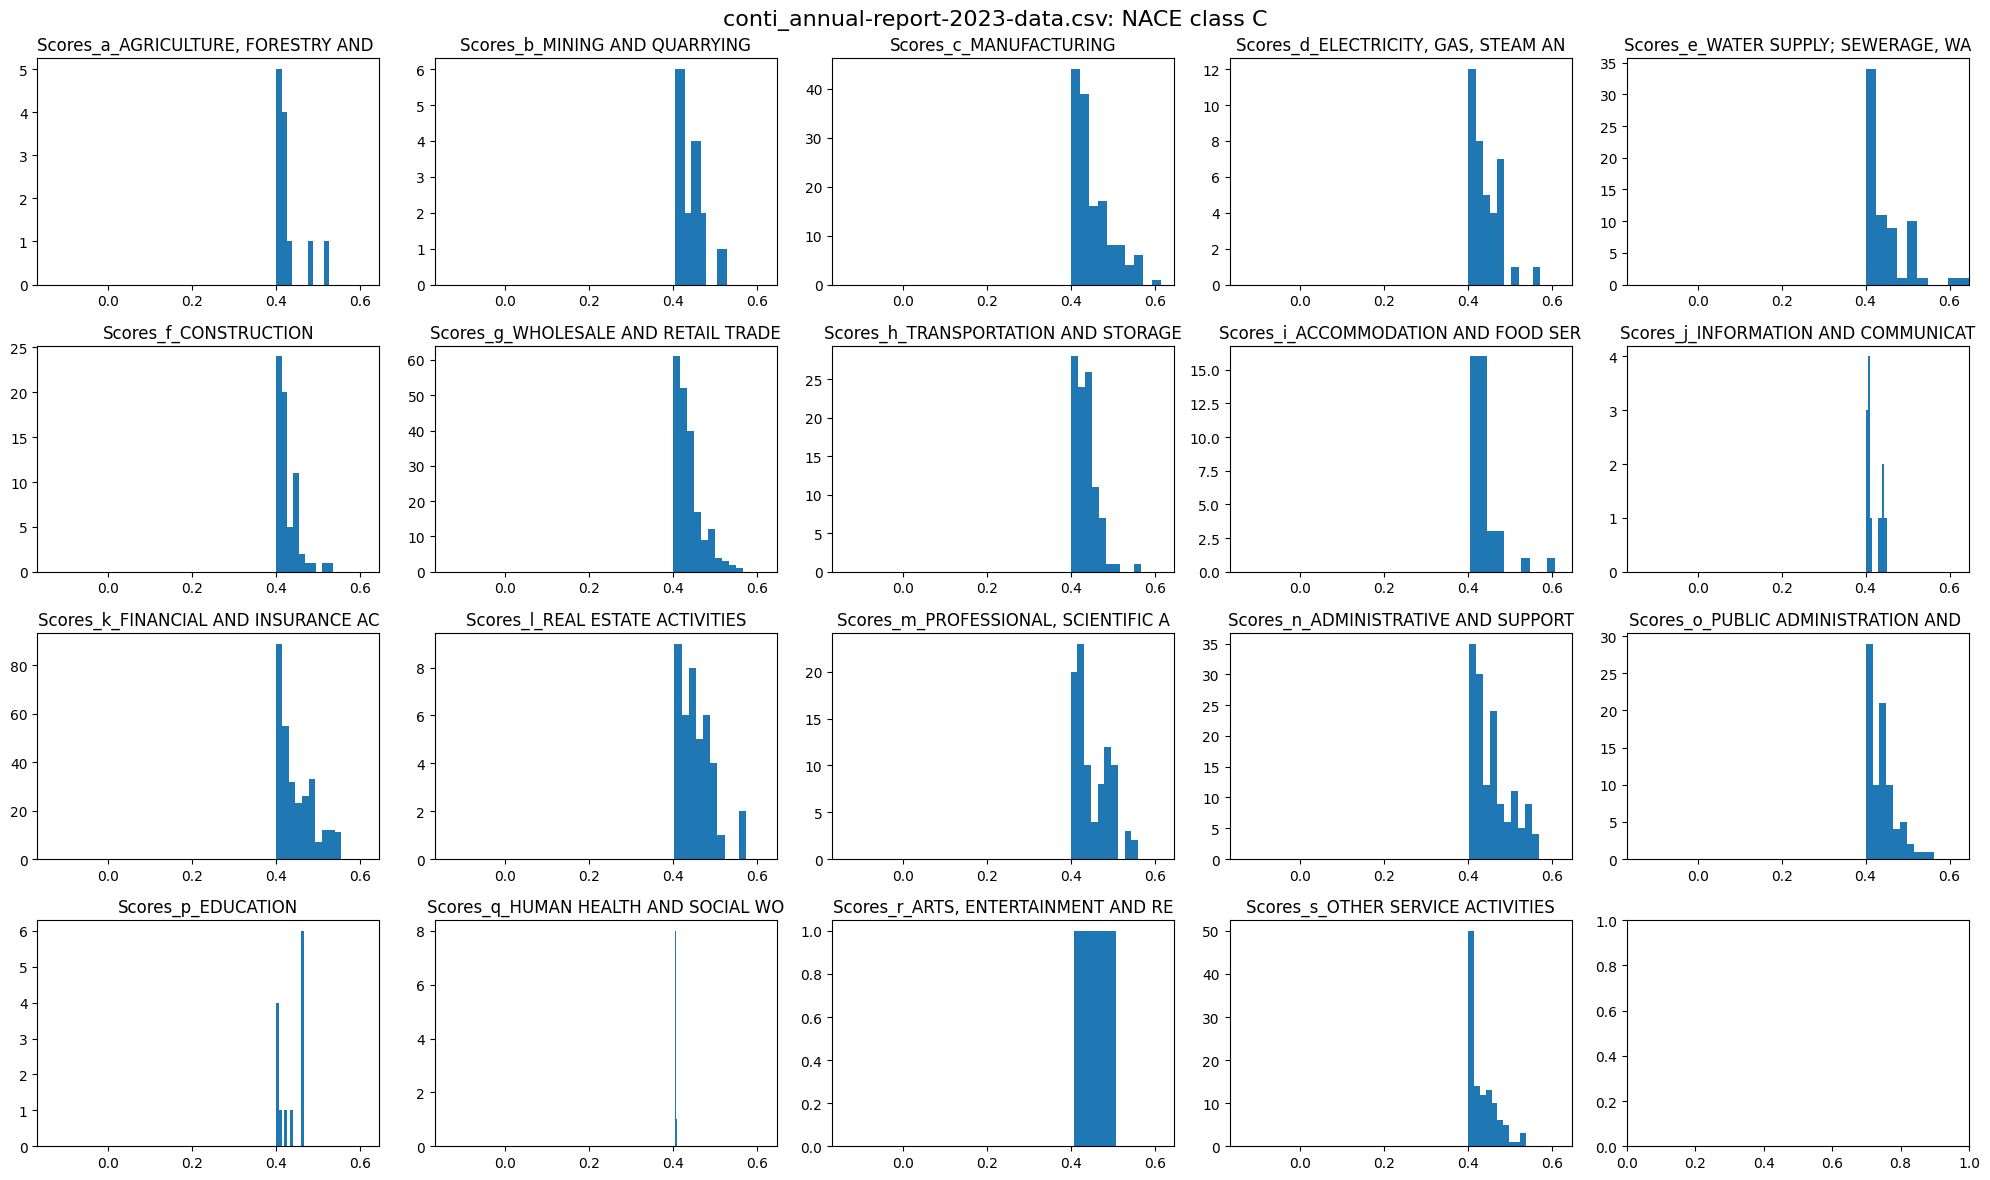

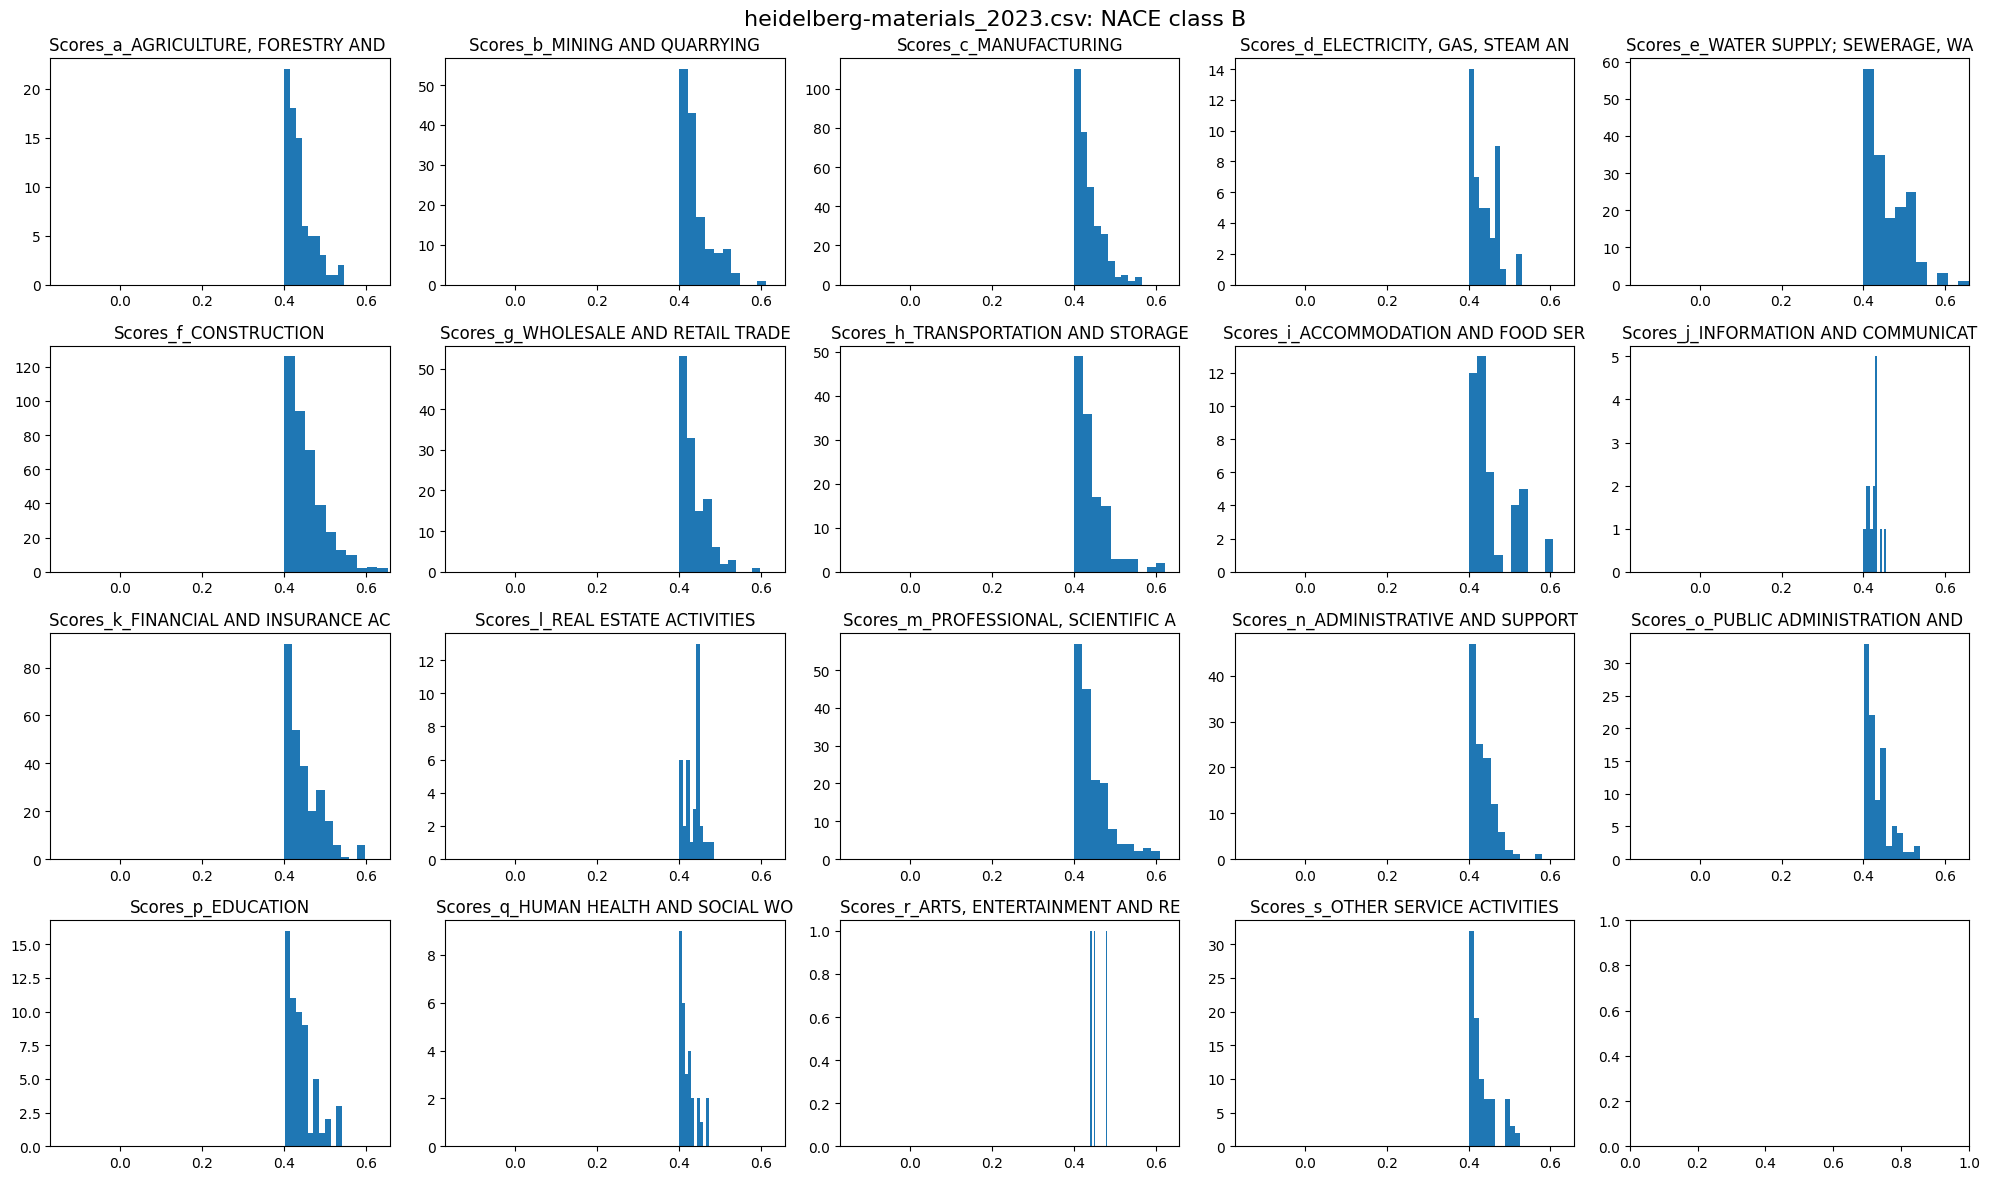

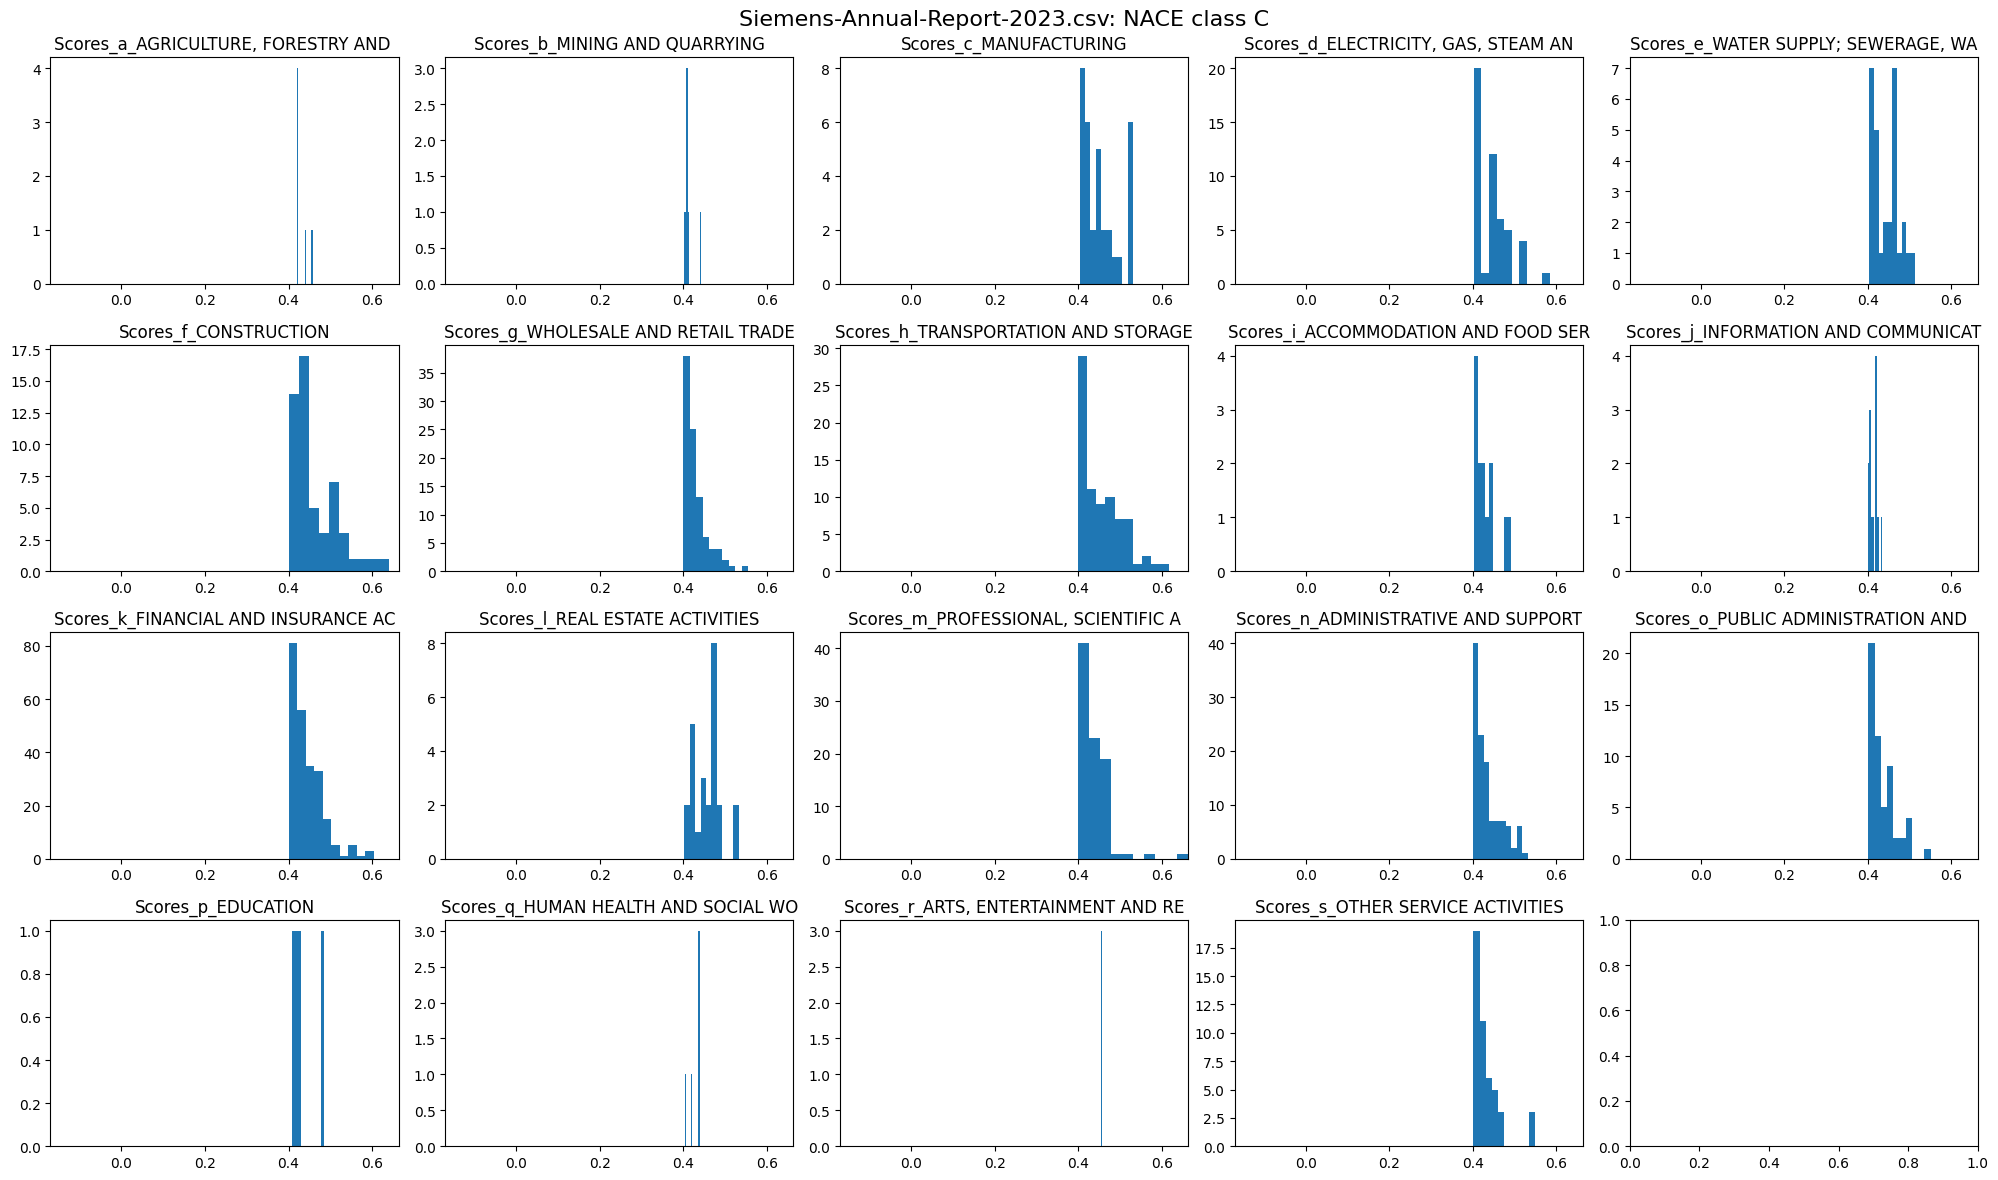

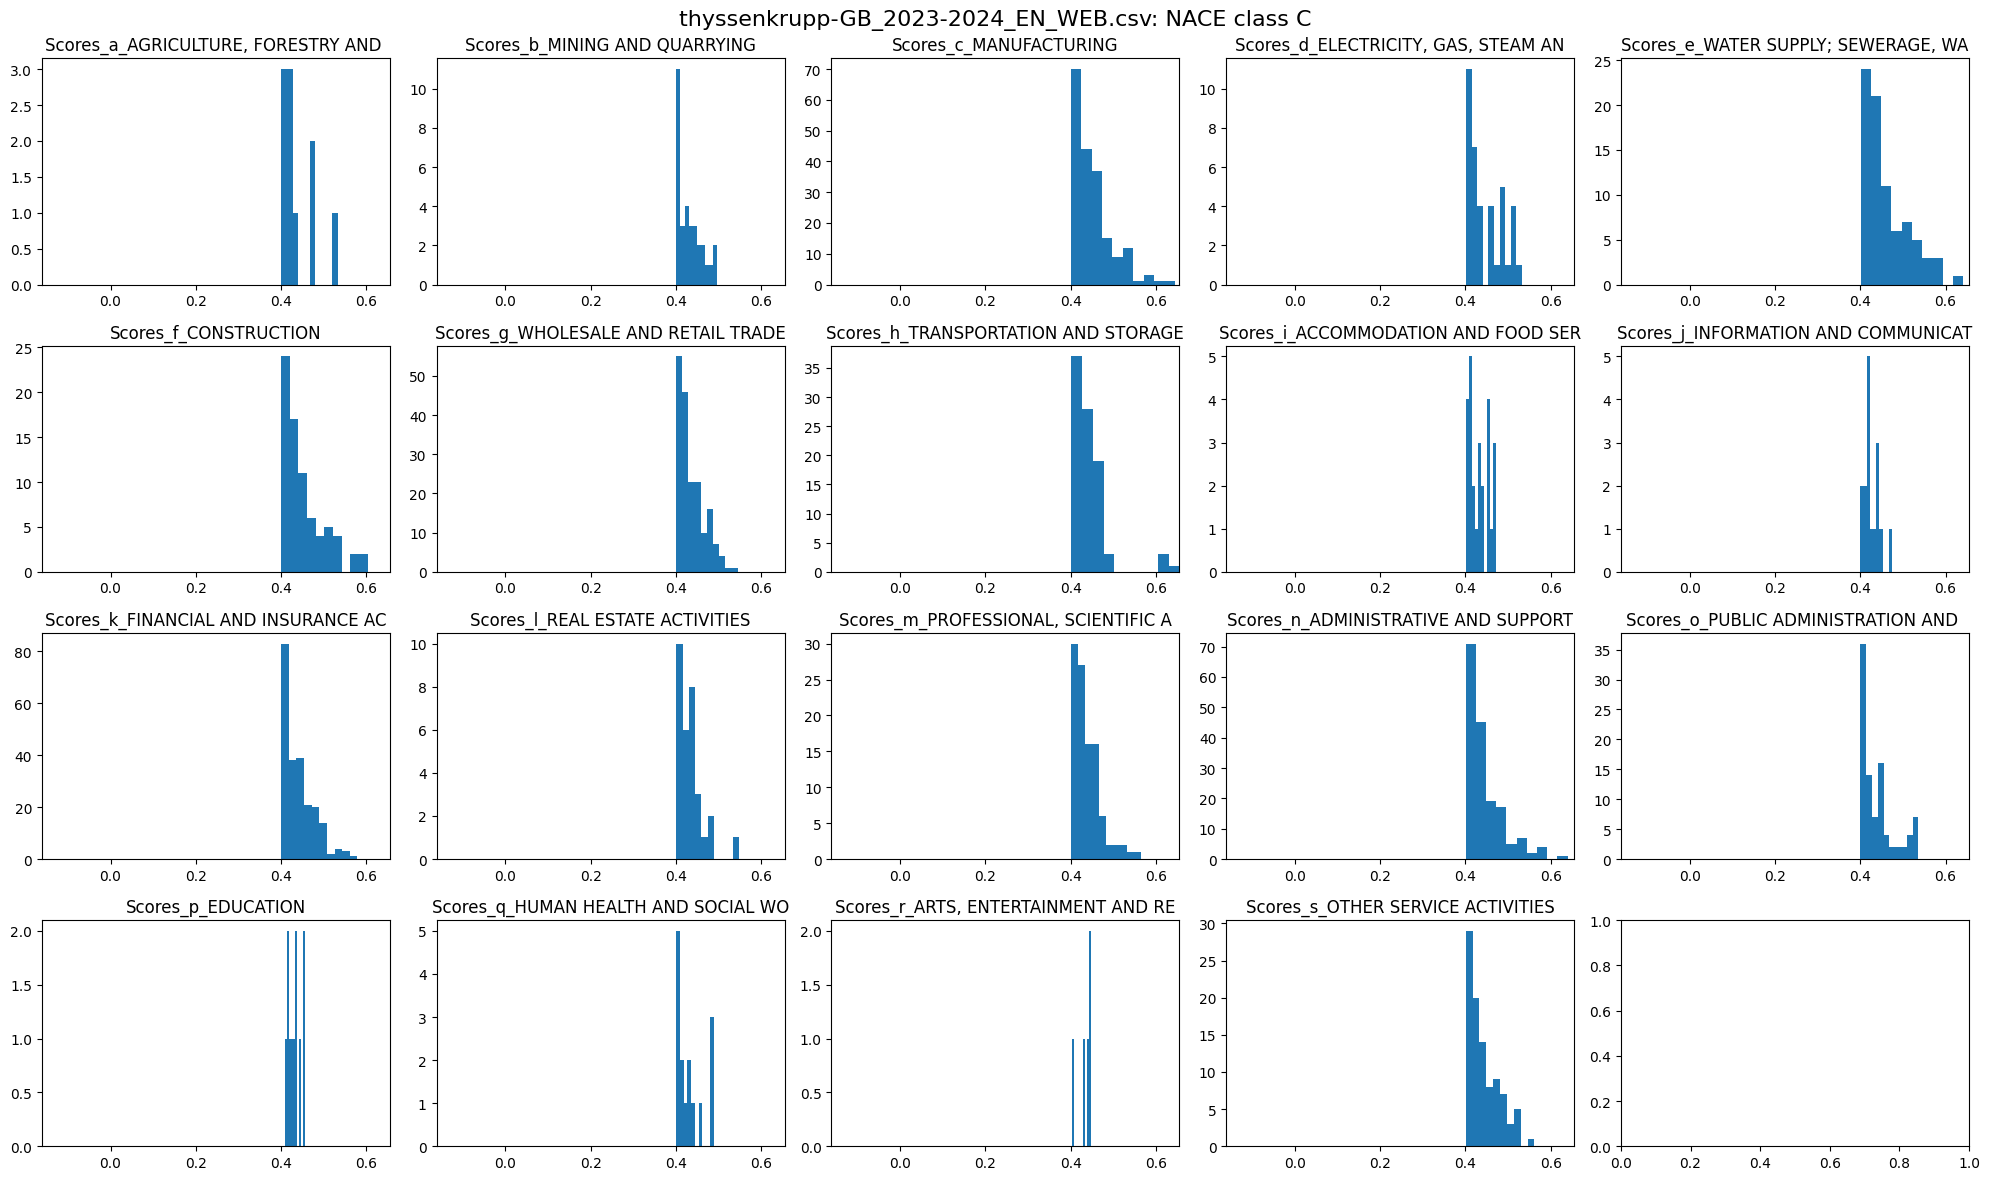

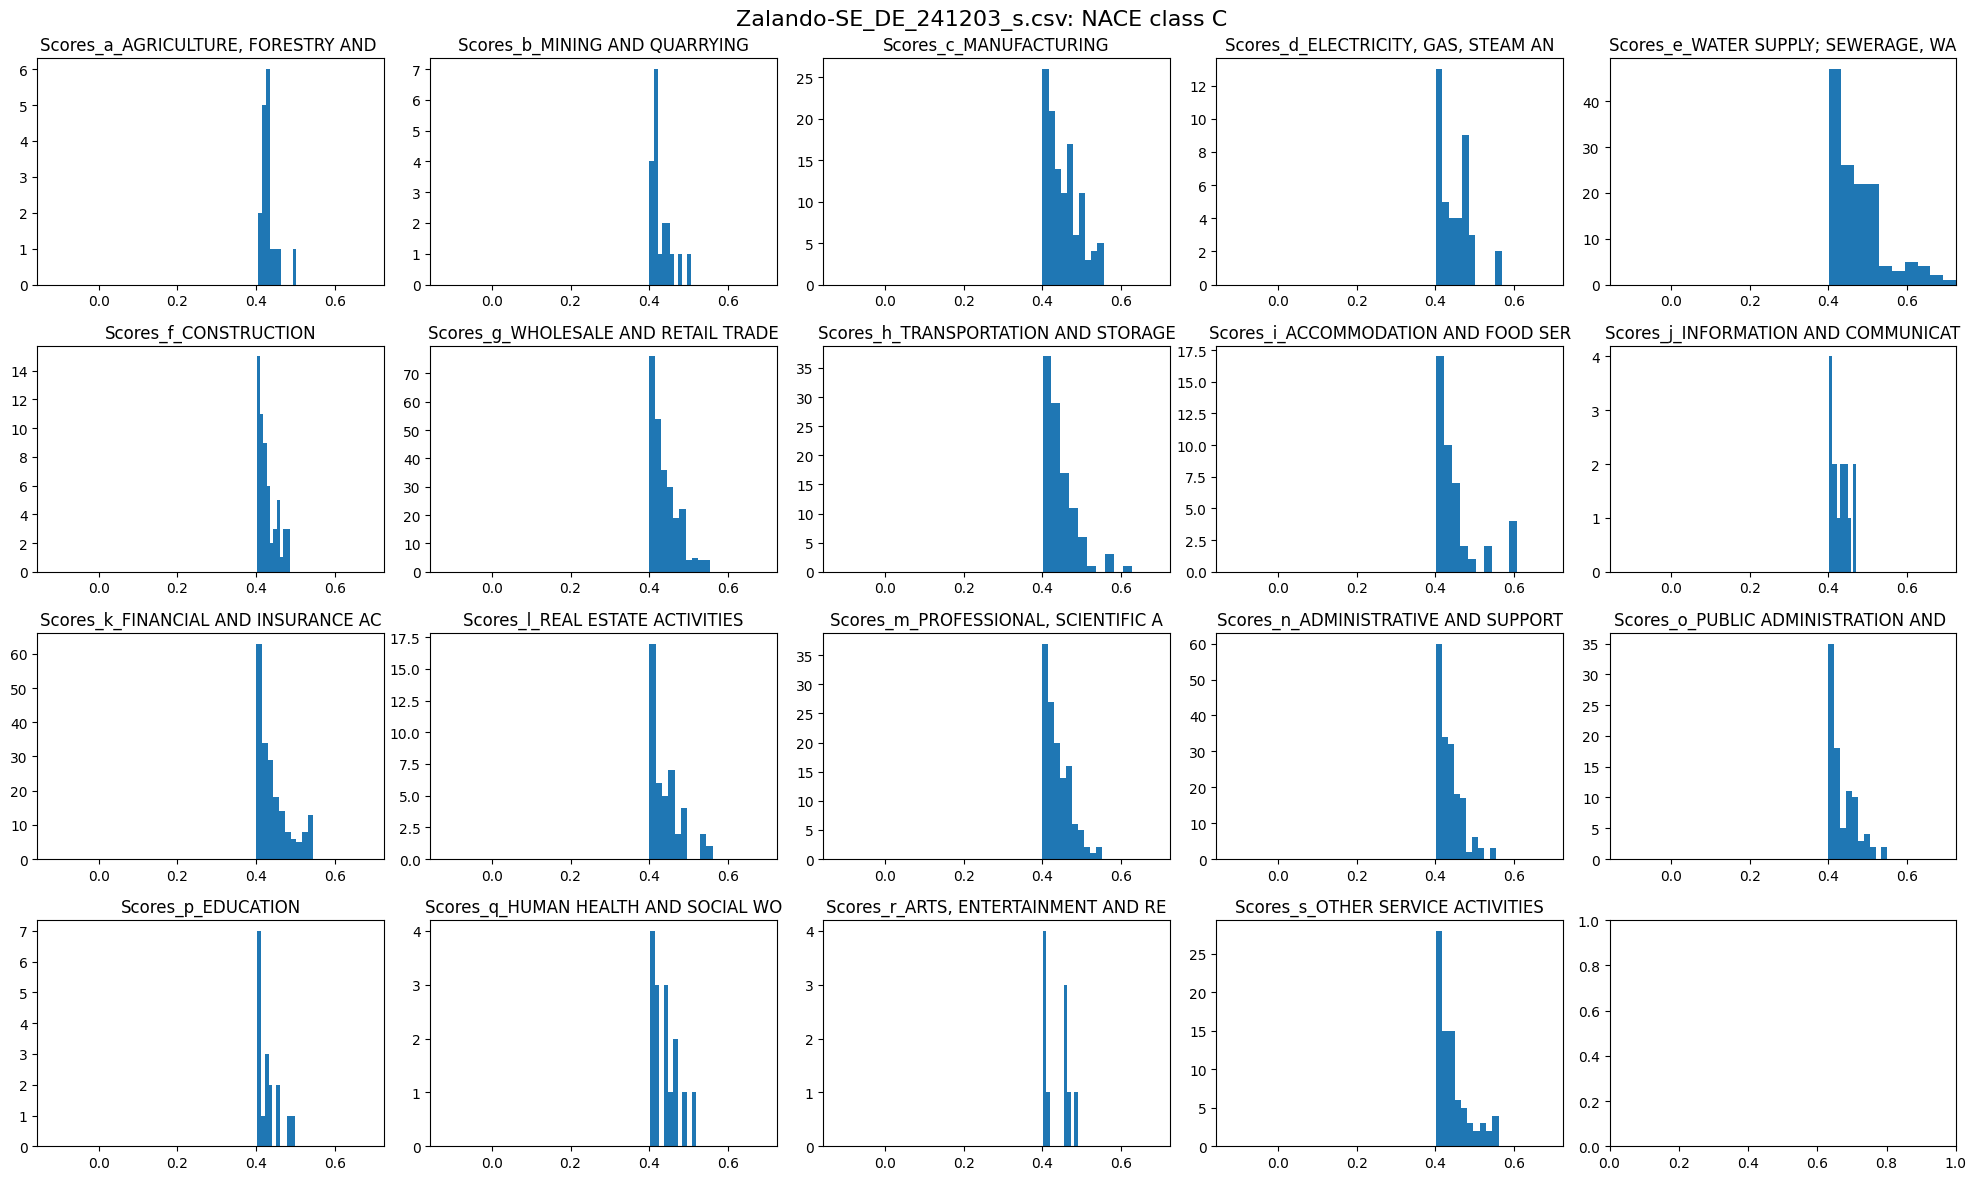

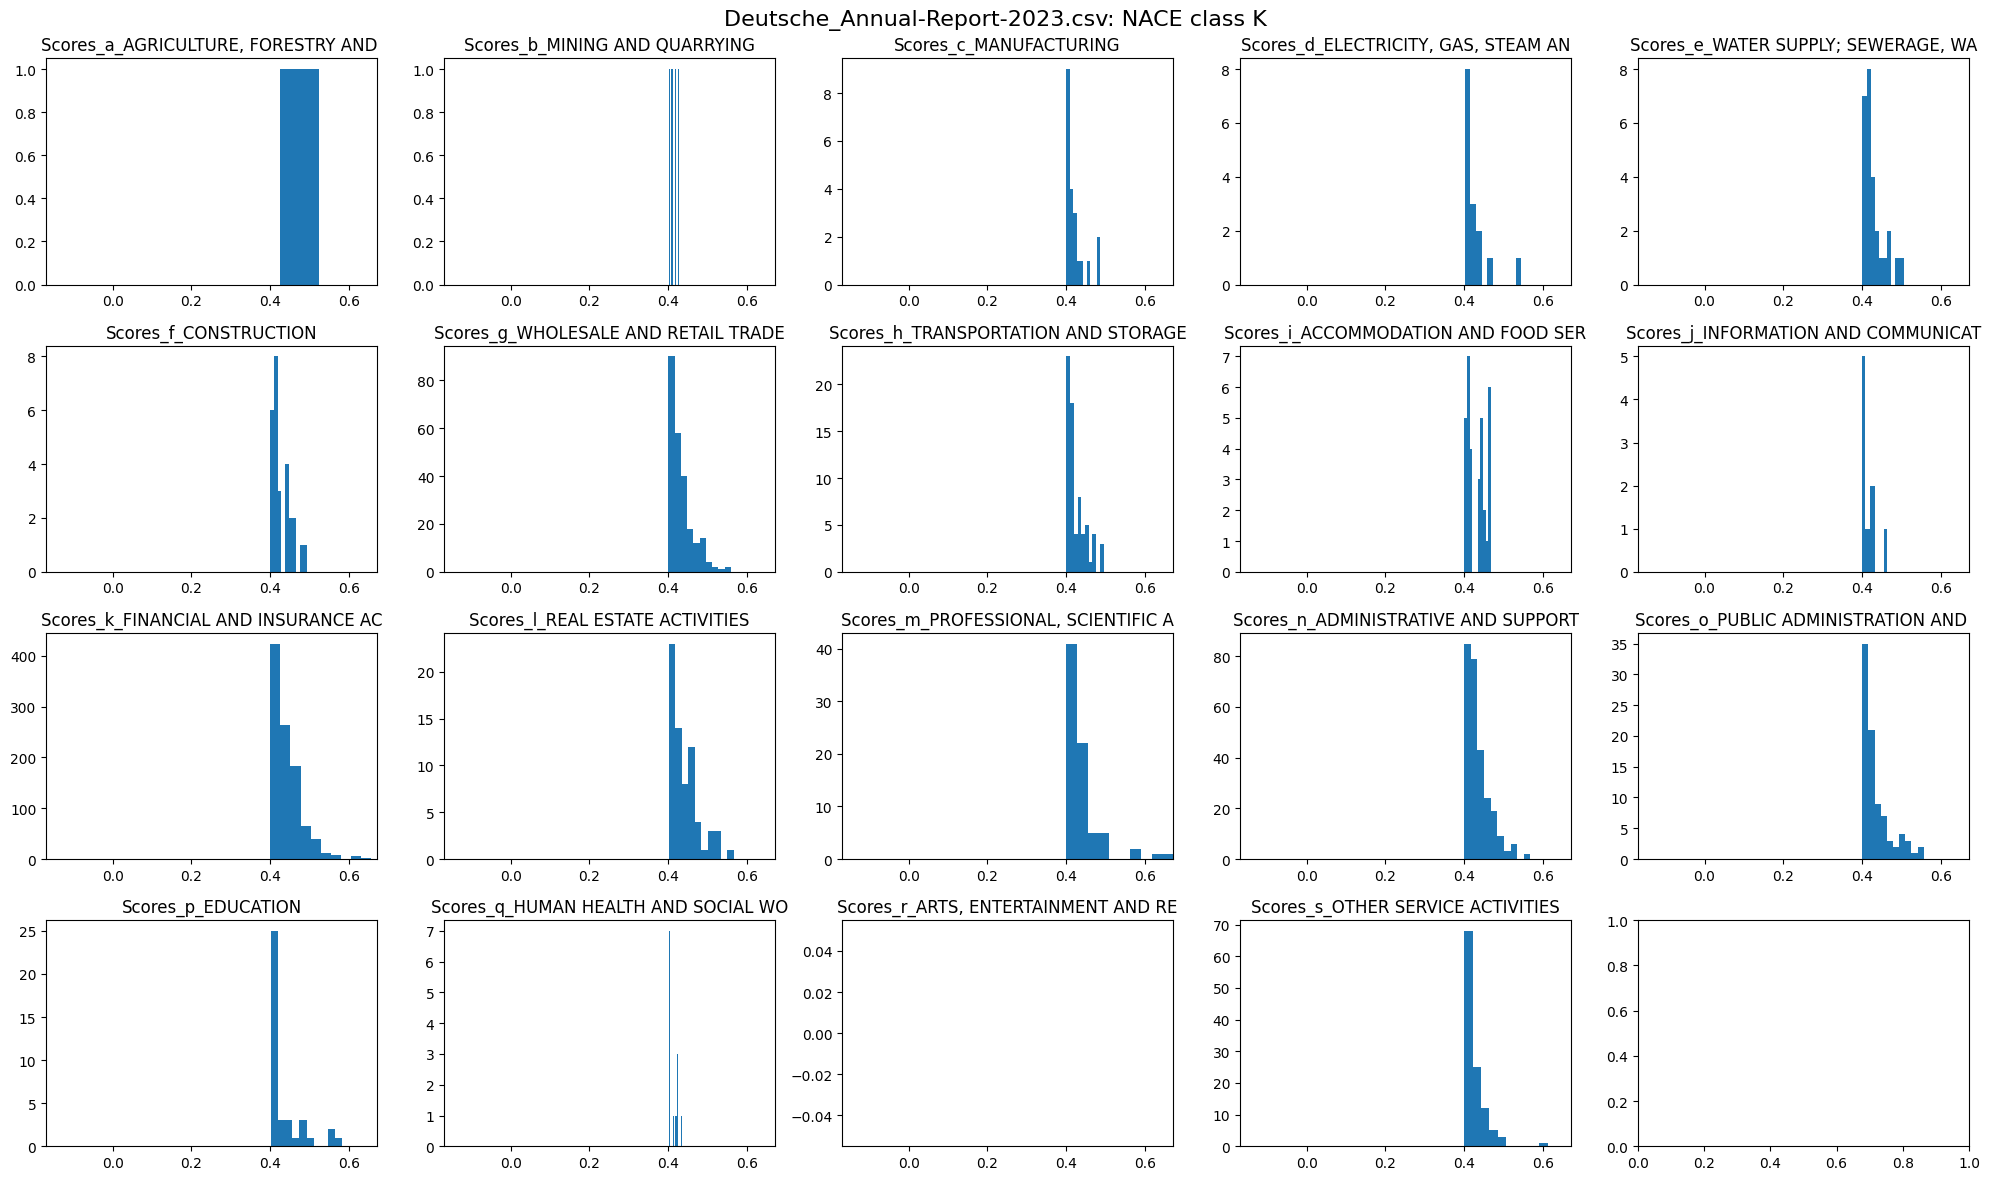

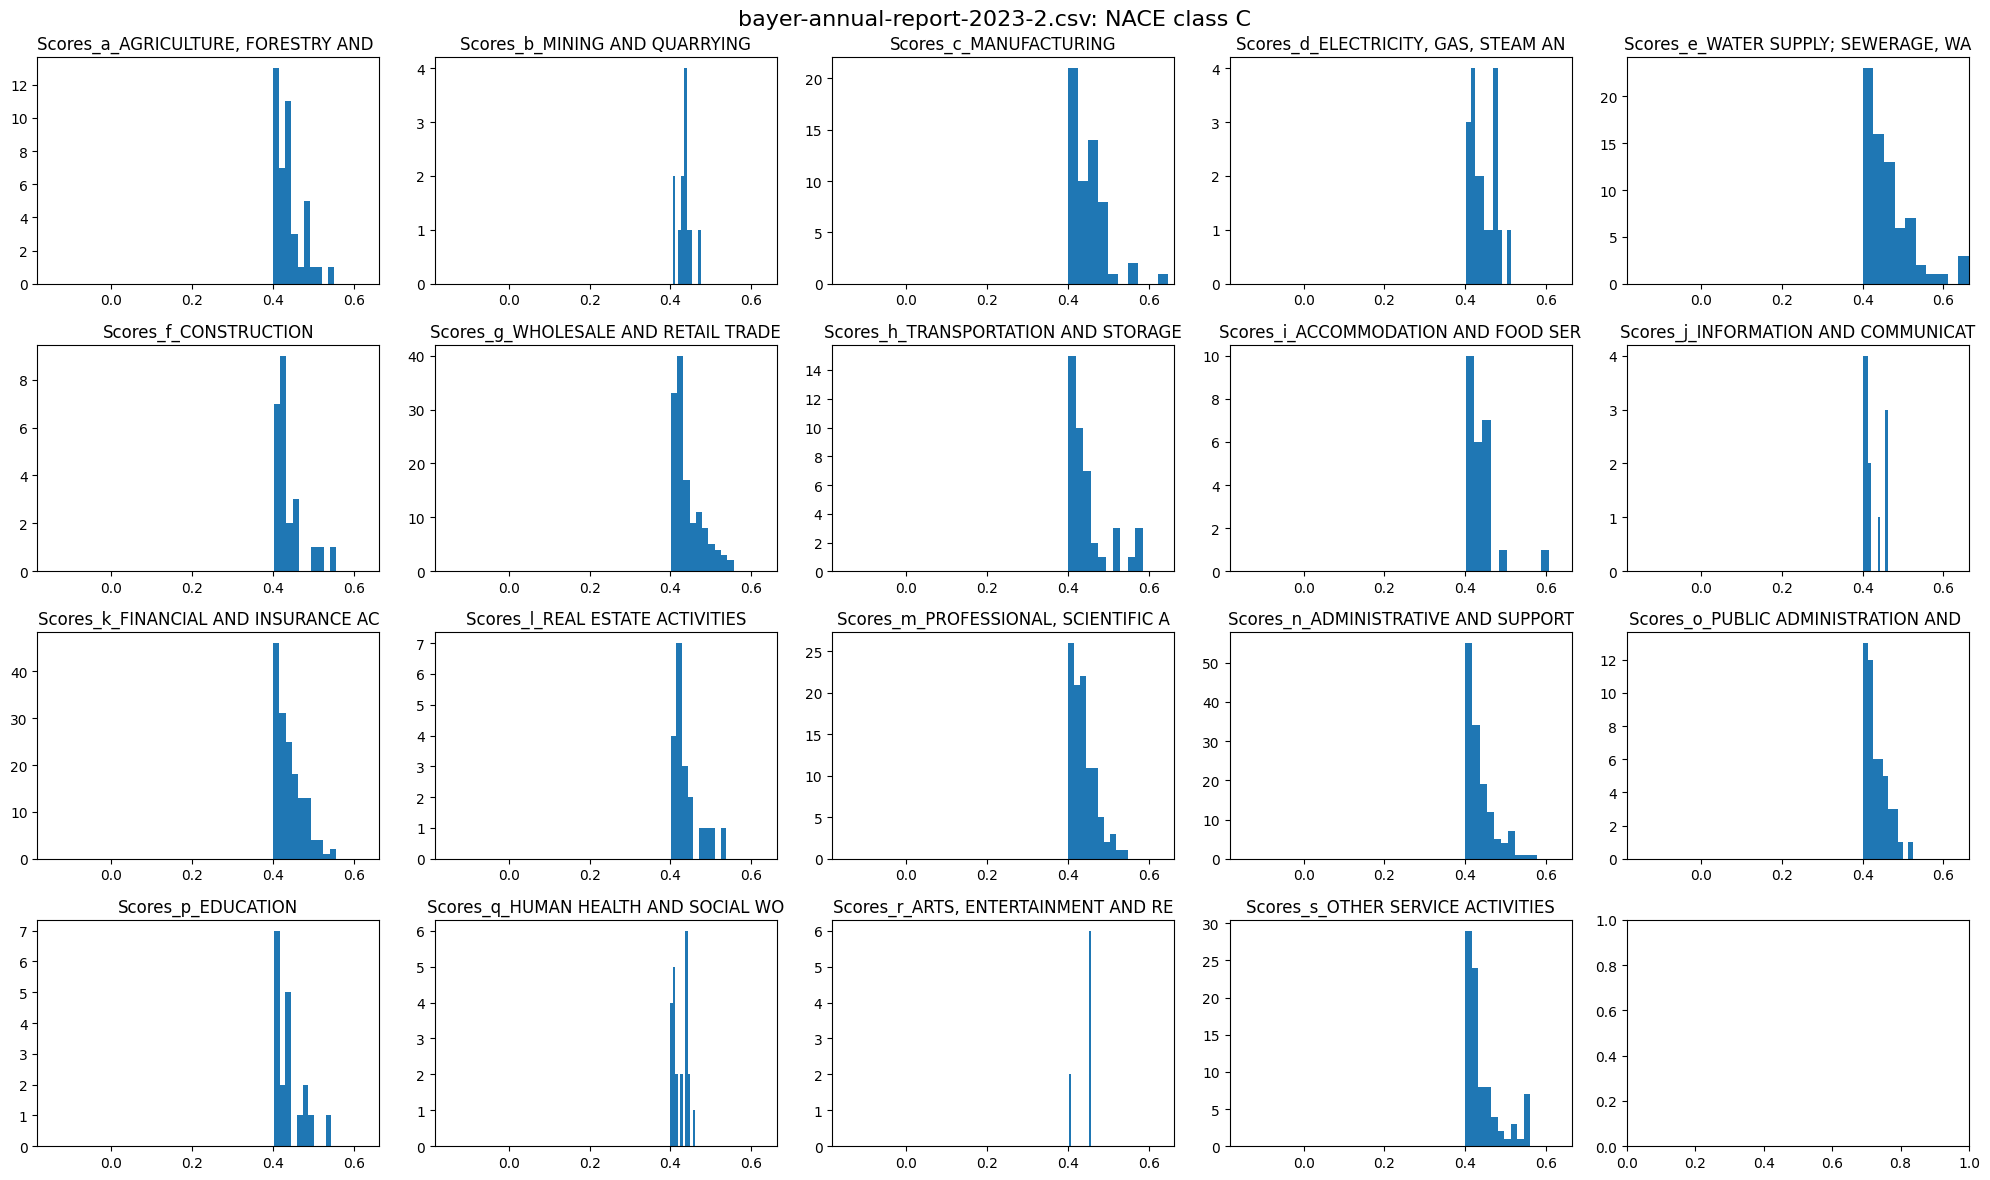

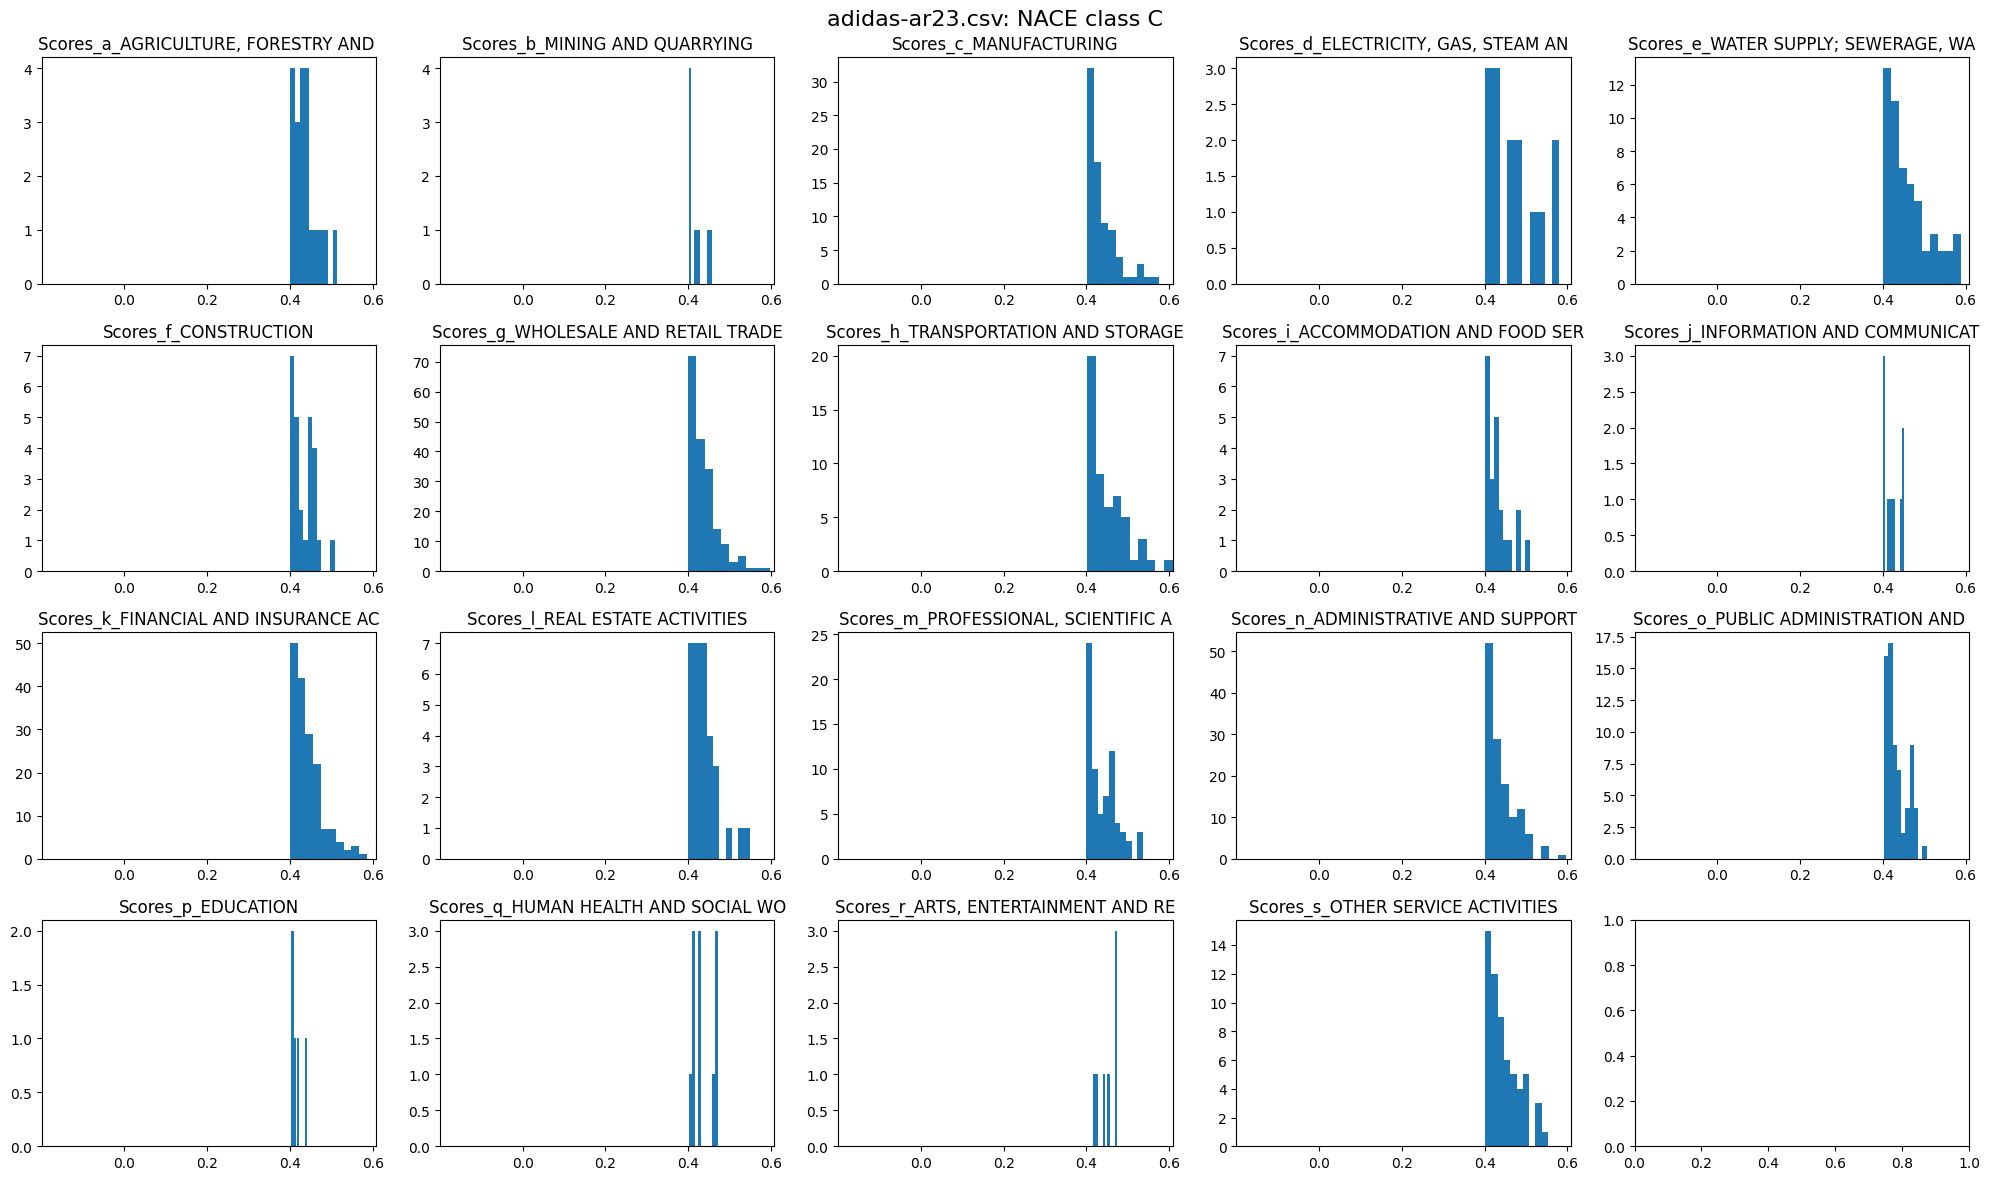

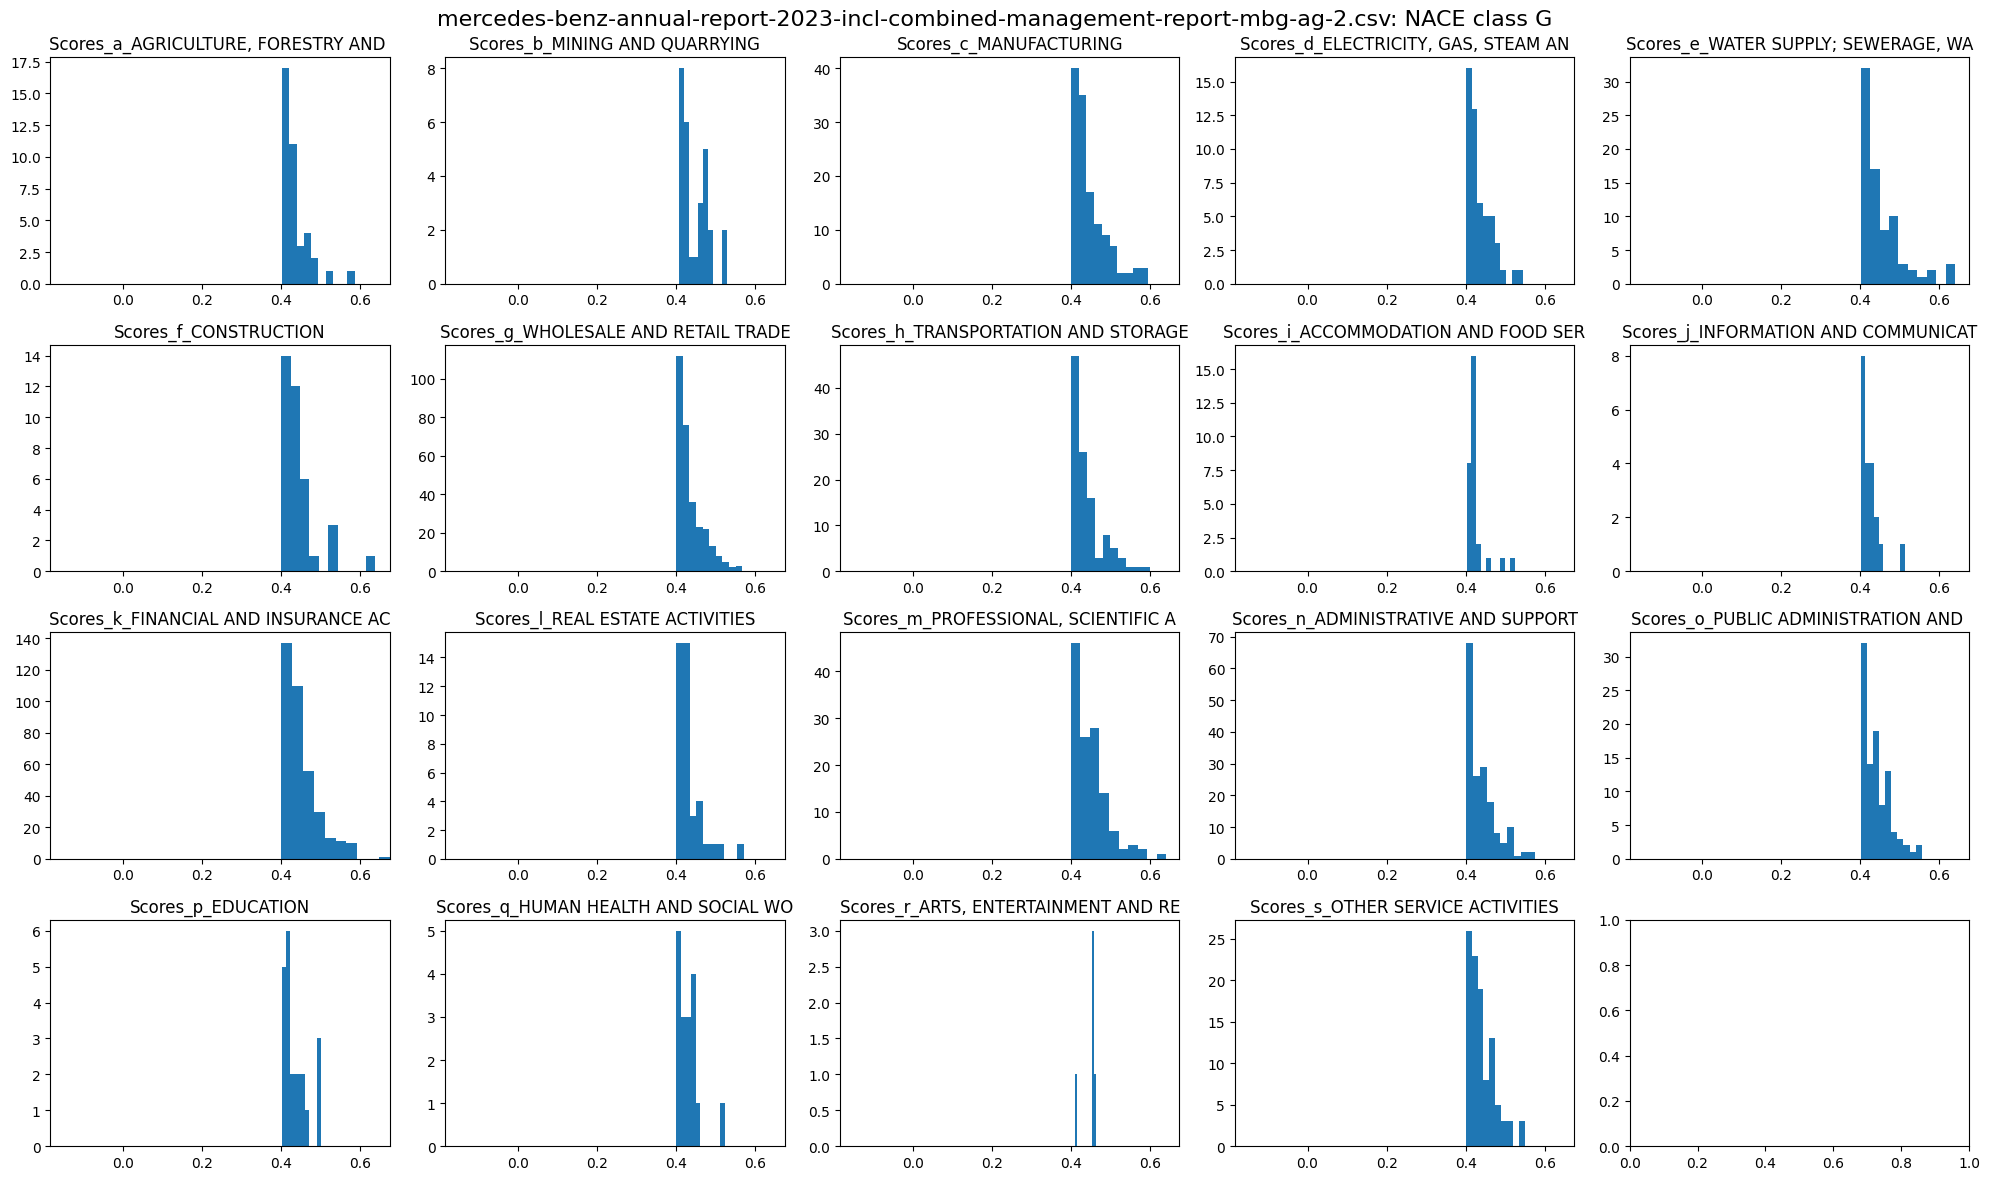

In [21]:
for j in range(len(df_paragraph_similarities)):
    fig, axes = plt.subplots(4, 5, figsize=(20, 12))
    axes = axes.flatten()

    min_x = df_paragraph_similarities[j][1].iloc[:,3:].min().min()
    max_x = df_paragraph_similarities[j][1].iloc[:,3:].max().max()

    for i in range(19):
        axes[i].hist(df_paragraph_similarities[j][1].iloc[:,3+i][df_paragraph_similarities[j][1].iloc[:,3+i] > cos_threshold])
        #axes[i].hist(df_paragraph_similarities[j][1].iloc[:,3+i])
        axes[i].set_title(df_paragraph_similarities[j][1].iloc[:,3+i].name[:35])
        axes[i].set_xlim([min_x, max_x])

    fig.suptitle(f"{df_paragraph_similarities[j][0]}.csv: NACE class {NACE_codes[df_paragraph_similarities[j][0]+'.csv']}", fontsize=16)
    plt.tight_layout()
    plt.show()